In [661]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [662]:
df = pd.read_csv("/kaggle/input/titanic/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [663]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [664]:
df.duplicated().sum()

0

In [665]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [666]:
df.isnull().sum()/df.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

approx 20% of age and 80% cabin data is null so we should delete the cabin column

In [667]:
df = df.drop(['Cabin','Name'],axis=1)

In [668]:
df.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [669]:
df.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

Here we can use mode to replace 2 null values in Embarked

In [670]:
df['Embarked'] = df['Embarked'].map({'S':0,'C':2,'Q':1})
df['Embarked'] = df['Embarked'].fillna(0)
df.Embarked.value_counts()

Embarked
0.0    646
2.0    168
1.0     77
Name: count, dtype: int64

In [671]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [672]:
df.Age.value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [673]:
df.Age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [674]:
df.Ticket.value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [675]:
df = df.drop('Ticket',axis=1)

In [676]:
df.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [677]:
df.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Gender played a big role in surviveing as shown above

In [678]:
df['Sex'] = pd.factorize(df['Sex'])[0]
df['Sex'].value_counts()

Sex
0    577
1    314
Name: count, dtype: int64

In [679]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 62.8 KB


In [680]:
df.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [681]:
df1 = df.copy()
df1 = df1.dropna()

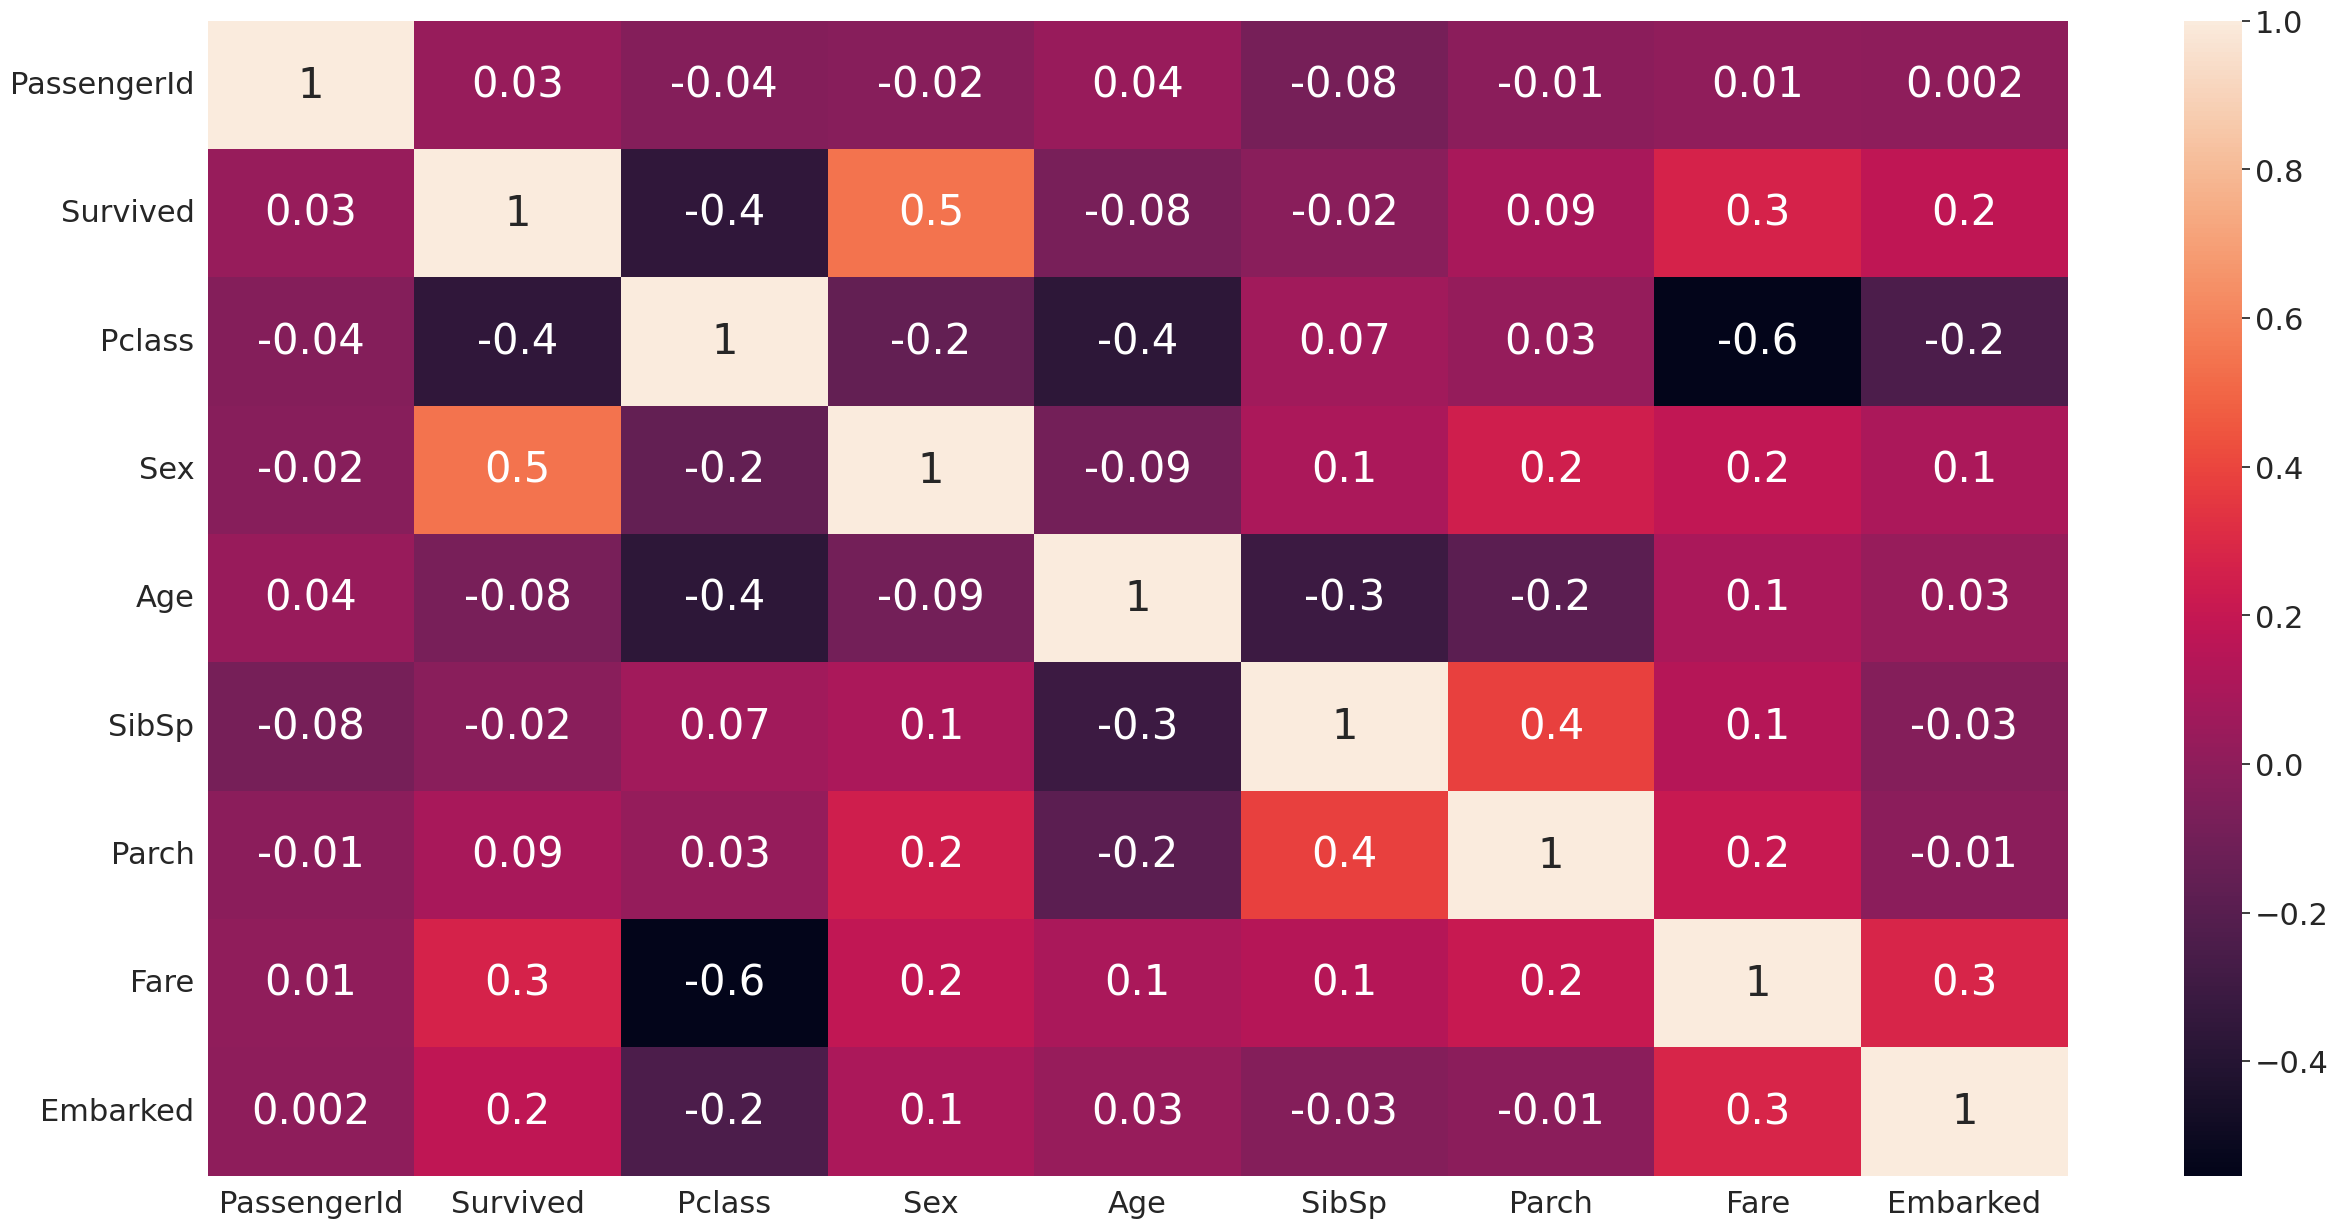

In [682]:
plt.figure(figsize=(30,15))
sns.heatmap(df1.corr(),fmt='.1g',annot=True,annot_kws={'fontsize':30})
sns.set(font_scale=2)

In [683]:
df=df.drop('PassengerId',axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,2.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0.0
887,1,1,1,19.0,0,0,30.0000,0.0
888,0,3,1,NaN,1,2,23.4500,0.0
889,1,1,0,26.0,0,0,30.0000,2.0


In [684]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
ii = IterativeImputer()
dfi = ii.fit_transform(df)
dfi = pd.DataFrame(dfi,columns=df.columns)

In [685]:
dfi

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3.0,0.0,22.000000,1.0,0.0,7.2500,0.0
1,1.0,1.0,1.0,38.000000,1.0,0.0,71.2833,2.0
2,1.0,3.0,1.0,26.000000,0.0,0.0,7.9250,0.0
3,1.0,1.0,1.0,35.000000,1.0,0.0,53.1000,0.0
4,0.0,3.0,0.0,35.000000,0.0,0.0,8.0500,0.0
...,...,...,...,...,...,...,...,...
886,0.0,2.0,0.0,27.000000,0.0,0.0,13.0000,0.0
887,1.0,1.0,1.0,19.000000,0.0,0.0,30.0000,0.0
888,0.0,3.0,1.0,23.377705,1.0,2.0,23.4500,0.0
889,1.0,1.0,0.0,26.000000,0.0,0.0,30.0000,2.0


In [686]:
dfi['family'] = dfi['SibSp'] + dfi['Parch']+1
dfi = dfi.drop(['SibSp','Parch'],axis=1)
dfi['family'].value_counts()

family
1.0     537
2.0     161
3.0     102
4.0      29
6.0      22
5.0      15
7.0      12
11.0      7
8.0       6
Name: count, dtype: int64

In [687]:
dfi.groupby(['family'])['Survived'].mean()

family
1.0     0.303538
2.0     0.552795
3.0     0.578431
4.0     0.724138
5.0     0.200000
6.0     0.136364
7.0     0.333333
8.0     0.000000
11.0    0.000000
Name: Survived, dtype: float64

If the number of family member are higher then the chance of surviving is low

In [688]:
def people(total):
    if total == 1:
        return 'alone'
    elif total > 1 and total<5:
        return 'small'
    else:
        return 'large'

In [689]:
dfi['family'] = dfi['family'].apply(people)
dfi['family'].value_counts()

family
alone    537
small    292
large     62
Name: count, dtype: int64

In [690]:
dfi.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
family      0
dtype: int64

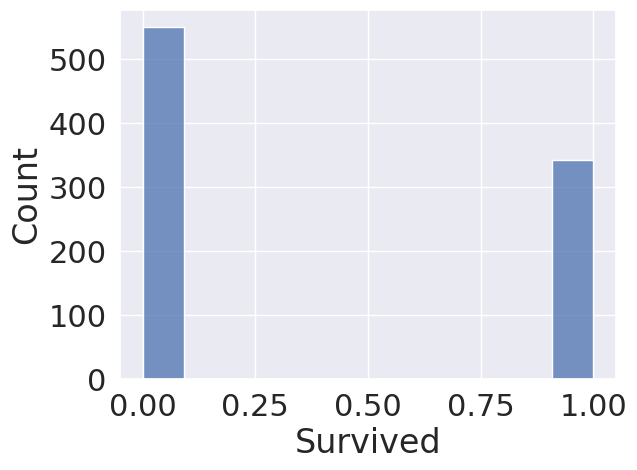

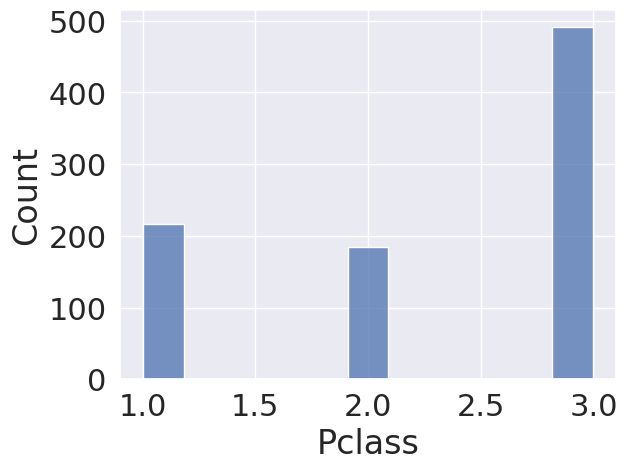

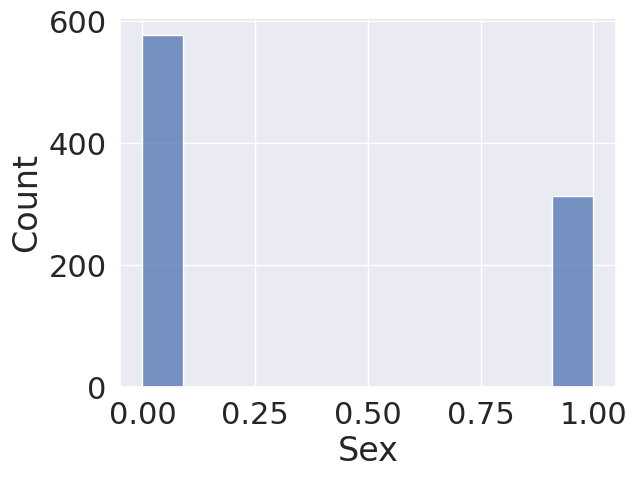

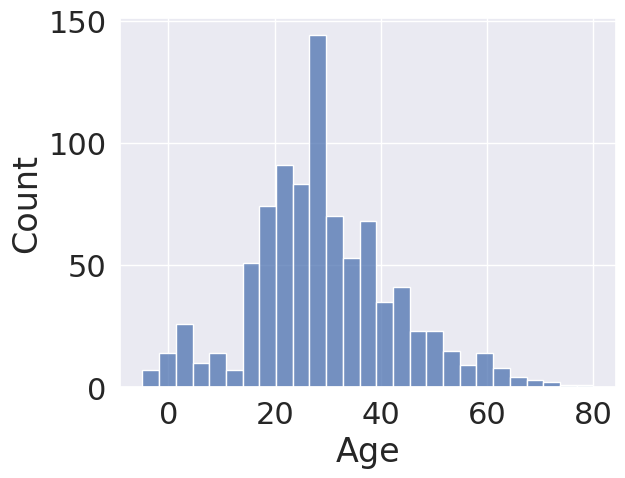

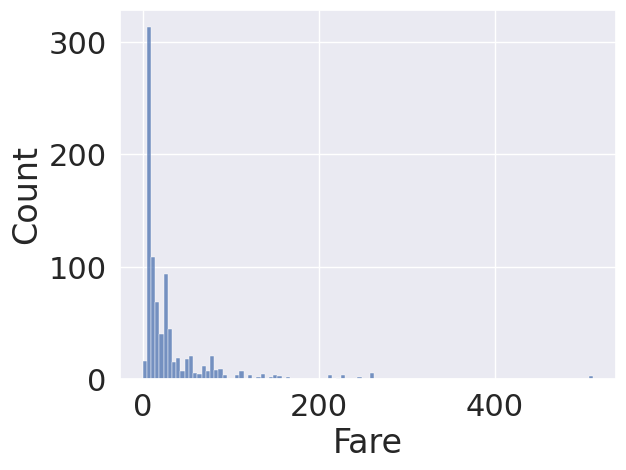

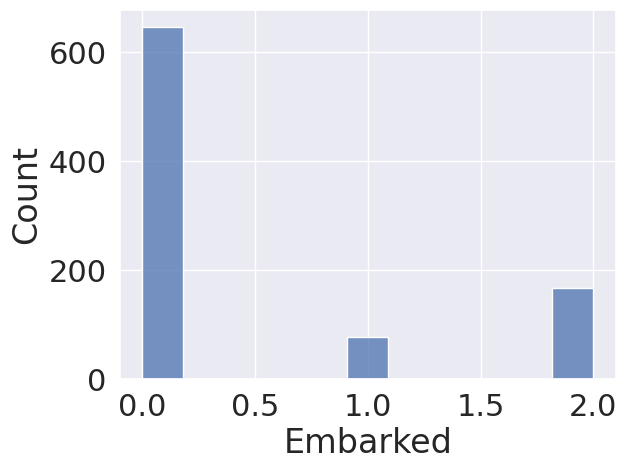

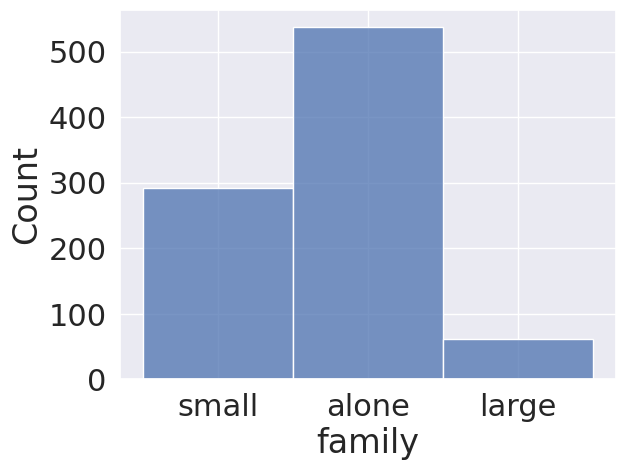

In [691]:
import warnings
warnings.filterwarnings('ignore')

for i in dfi.columns:
    sns.histplot(data=dfi,x=i)
    plt.show()

In [692]:
dfi['family'] = dfi['family'].map({'alone':0,'small':1,'large':2})

In [693]:
dfi.groupby(['Age'])['Survived'].mean()

Age
-4.906068     0.0
-4.879698     0.0
 0.420000     1.0
 0.670000     1.0
 0.750000     1.0
             ... 
 70.000000    0.0
 70.500000    0.0
 71.000000    0.0
 74.000000    0.0
 80.000000    1.0
Name: Survived, Length: 192, dtype: float64

Survived
0.4777174662568536


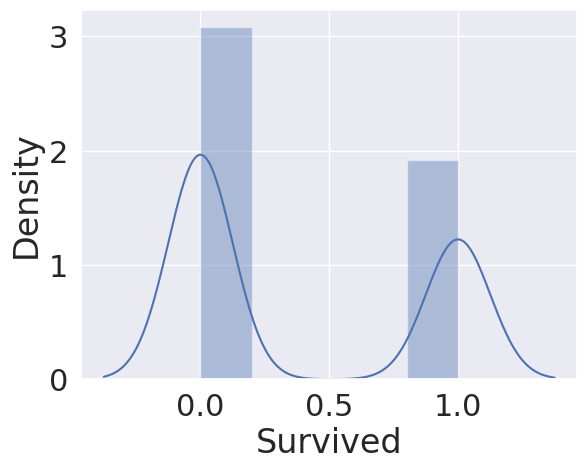

Pclass
-0.6294858816096934


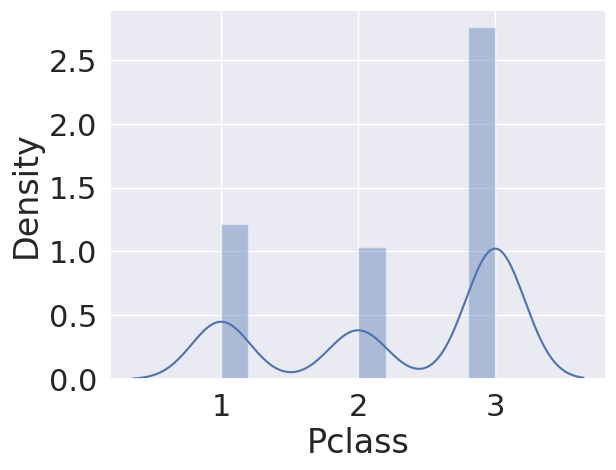

Sex
0.6178784065548291


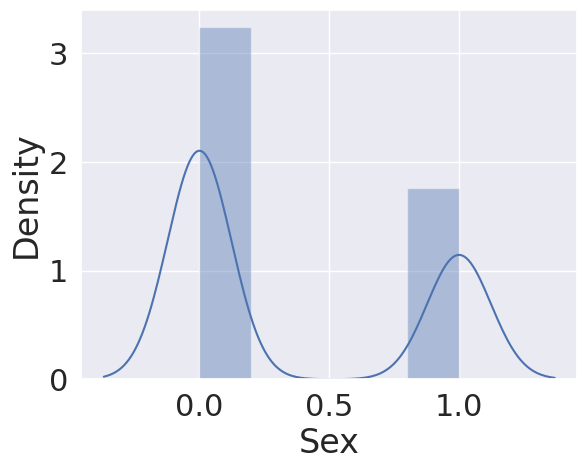

Age
0.34272787977939323


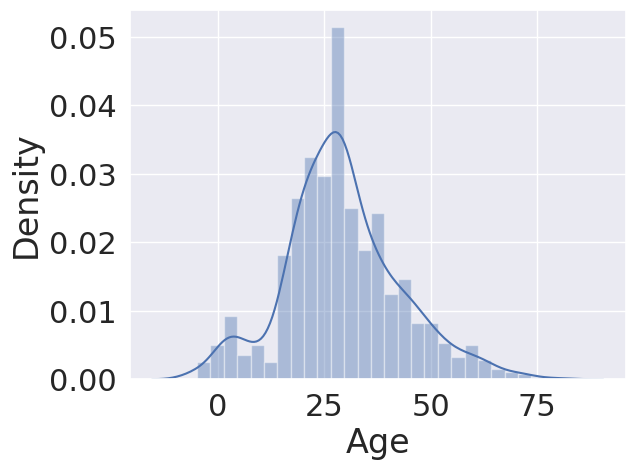

Fare
4.7792532923723545


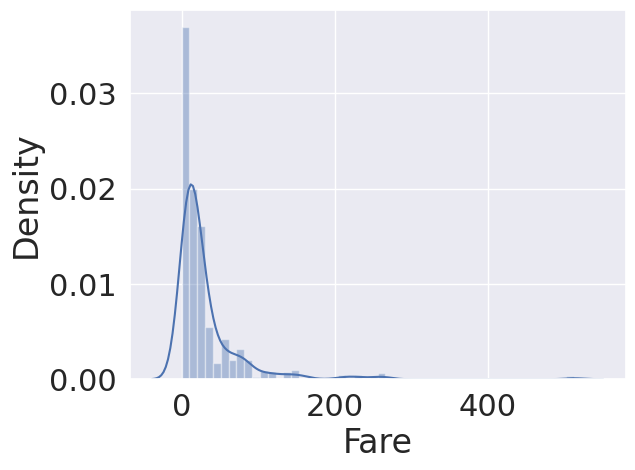

Embarked
1.2626927433430535


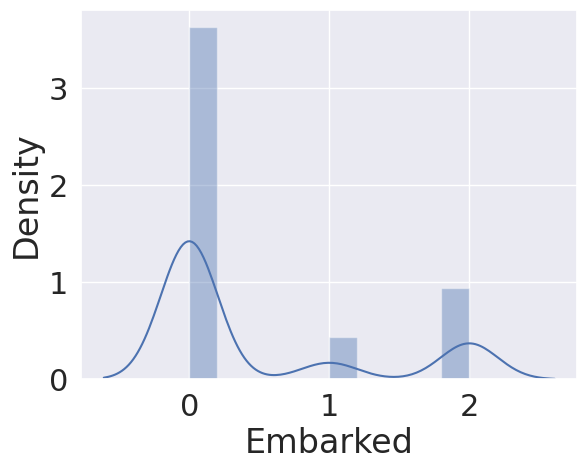

family
0.9888604591188527


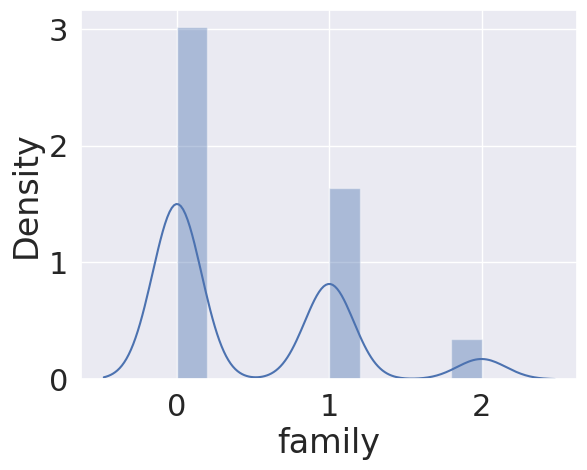

In [694]:
from scipy.stats import skew
for col in dfi:
    print(col)
    print(skew(dfi[col]))
    
    plt.figure()
    sns.distplot(dfi[col])
    plt.show()

<Axes: >

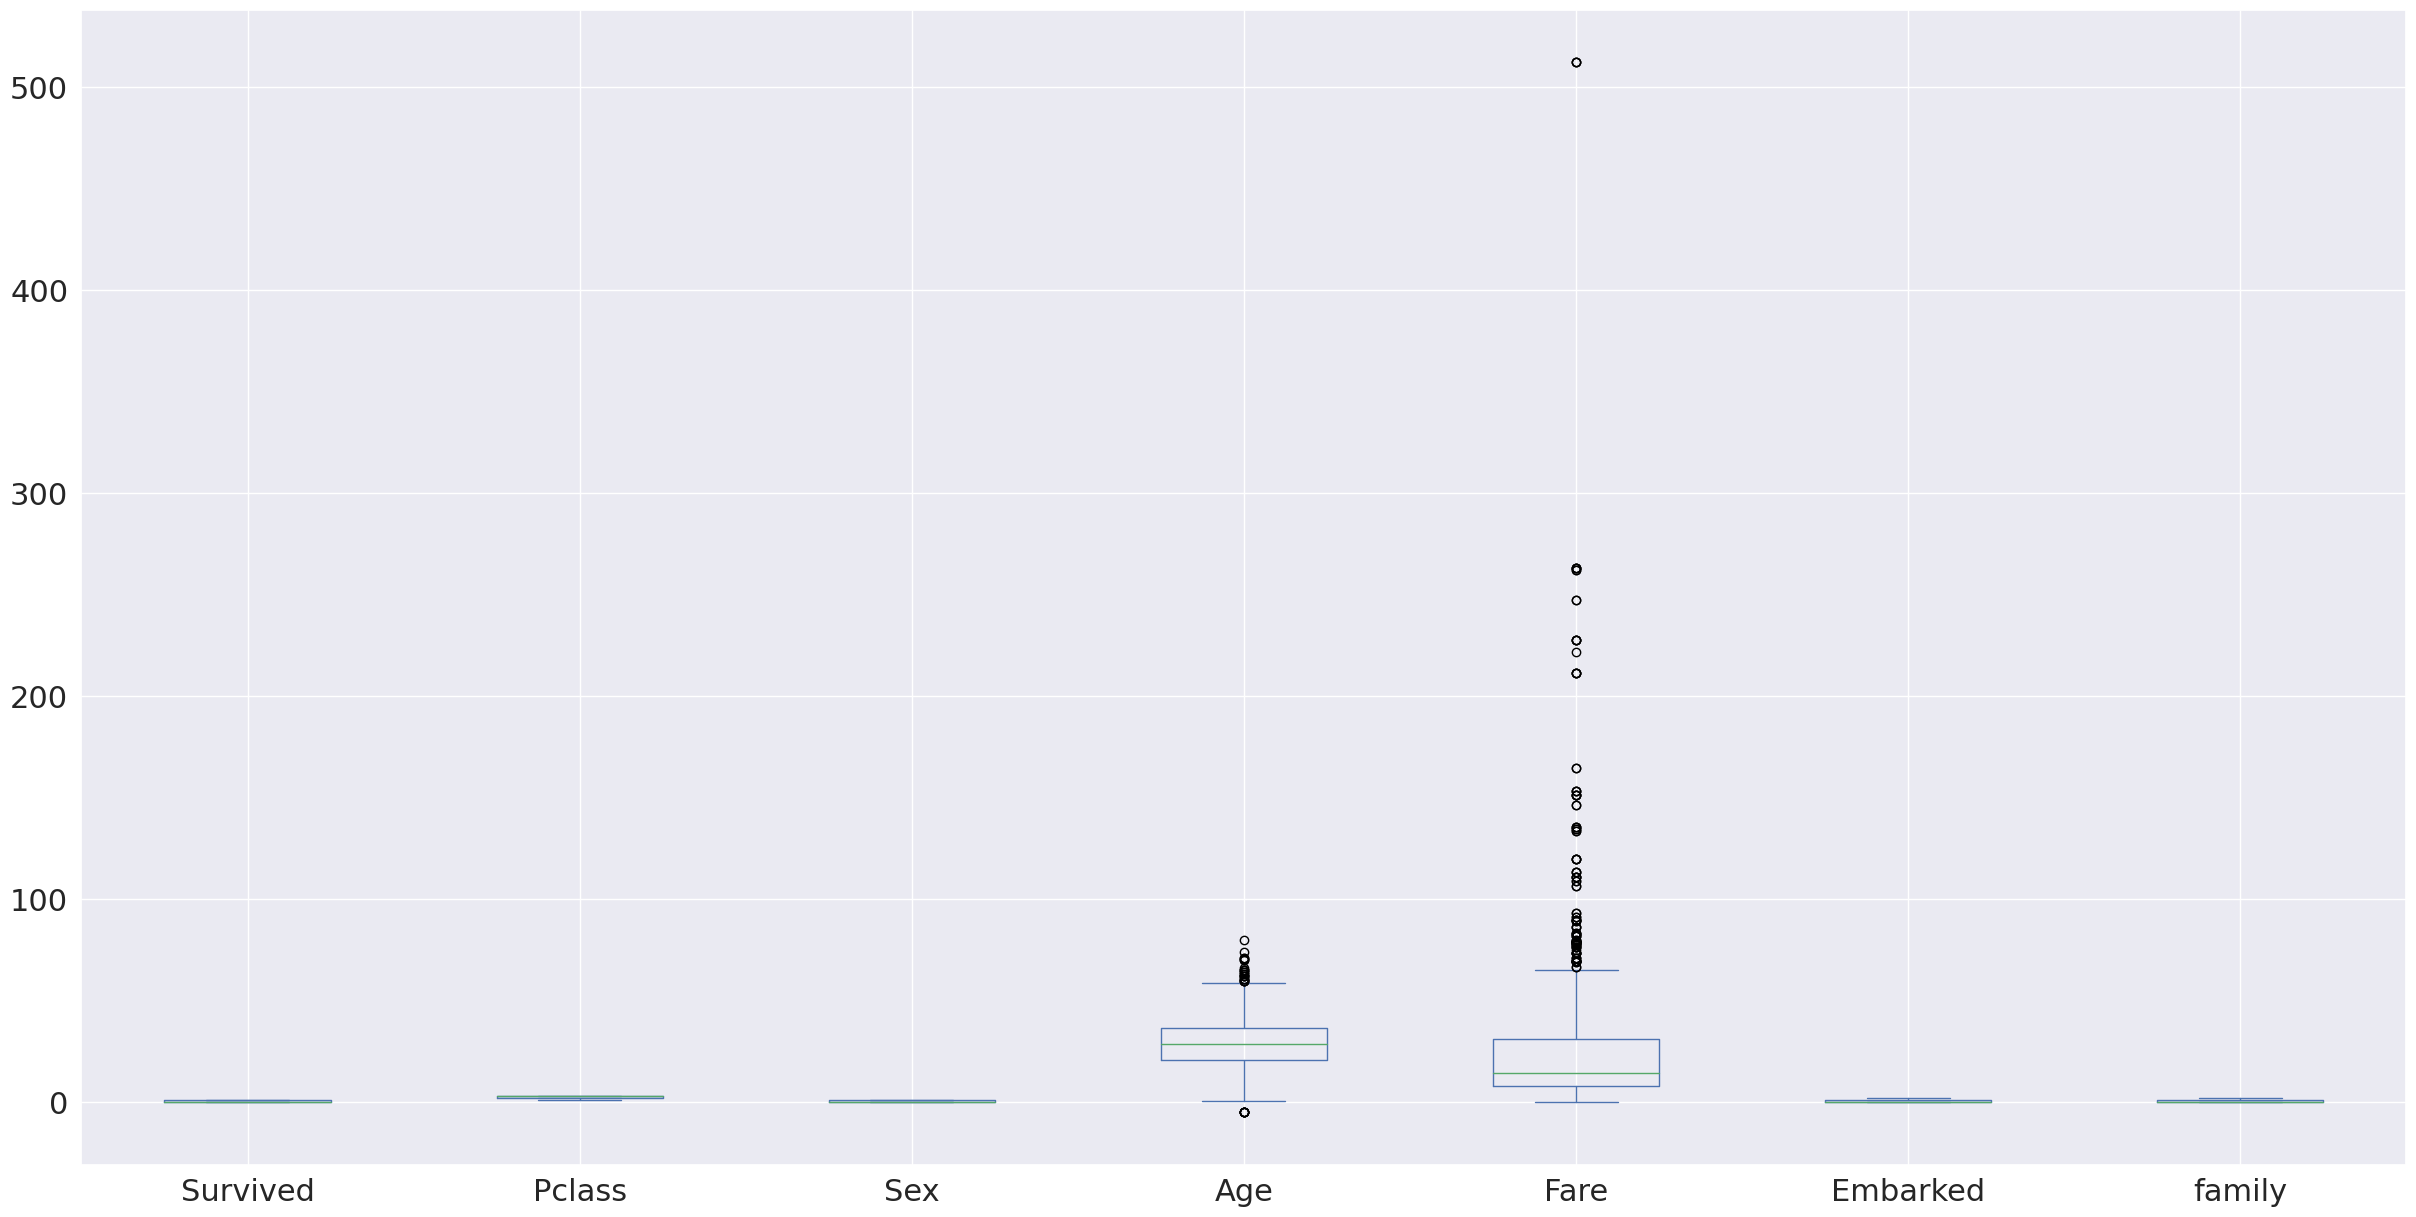

In [695]:
dfi.plot(kind='box',figsize=(30,15))

In [696]:
dfi.describe()

,Survived,Pclass,Sex,Age,Fare,Embarked,family
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.266138,32.204208,0.463524,0.466891
std,0.486592,0.836071,0.477990,13.702664,49.693429,0.791503,0.623305
min,0.000000,1.000000,0.000000,-4.906068,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,21.000000,7.910400,0.000000,0.000000
50%,0.000000,3.000000,0.000000,28.570768,14.454200,0.000000,0.000000
75%,1.000000,3.000000,1.000000,36.489302,31.000000,1.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,512.329200,2.000000,2.000000


In [697]:
dfi=dfi[dfi['Fare']<300]
dfi

,Survived,Pclass,Sex,Age,Fare,Embarked,family
0,0.0,3.0,0.0,22.000000,7.2500,0.0,1
1,1.0,1.0,1.0,38.000000,71.2833,2.0,1
2,1.0,3.0,1.0,26.000000,7.9250,0.0,0
3,1.0,1.0,1.0,35.000000,53.1000,0.0,1
4,0.0,3.0,0.0,35.000000,8.0500,0.0,0
...,...,...,...,...,...,...,...
886,0.0,2.0,0.0,27.000000,13.0000,0.0,0
887,1.0,1.0,1.0,19.000000,30.0000,0.0,0
888,0.0,3.0,1.0,23.377705,23.4500,0.0,1
889,1.0,1.0,0.0,26.000000,30.0000,2.0,0


In [698]:
dfi.skew()

Survived    0.487605
Pclass     -0.640238
Sex         0.618628
Age         0.347266
Fare        3.187877
Embarked    1.281891
family      0.990031
dtype: float64

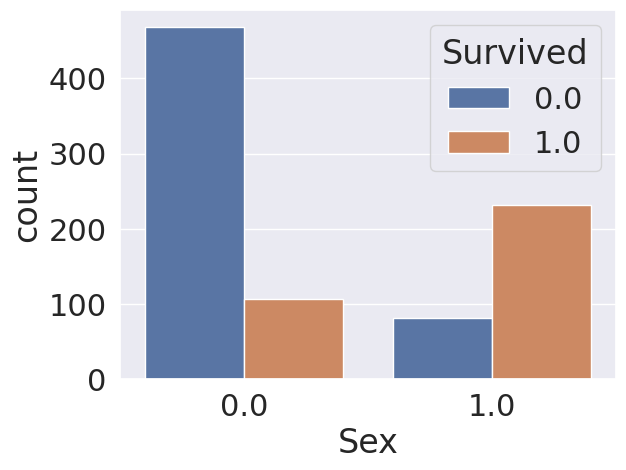

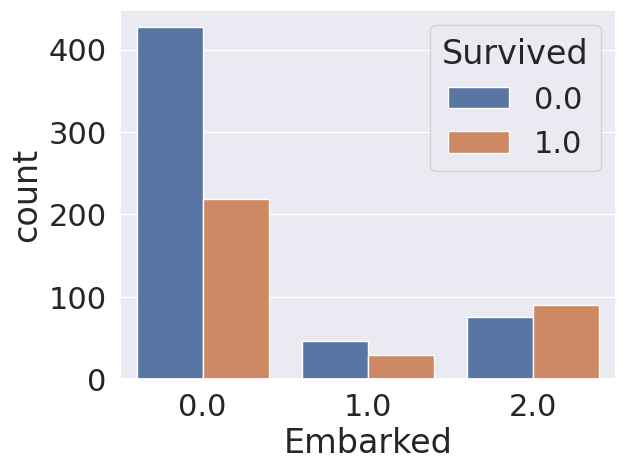

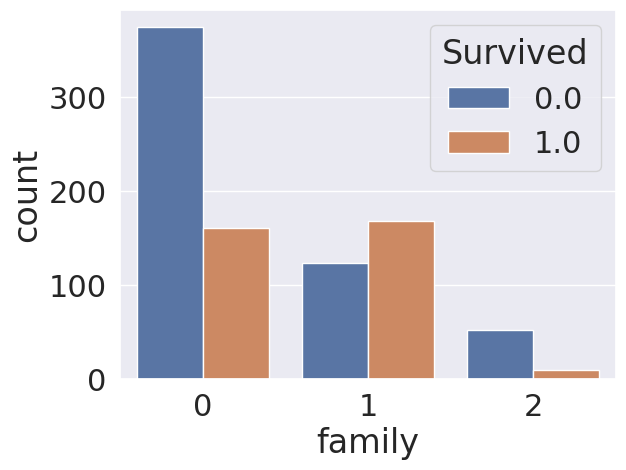

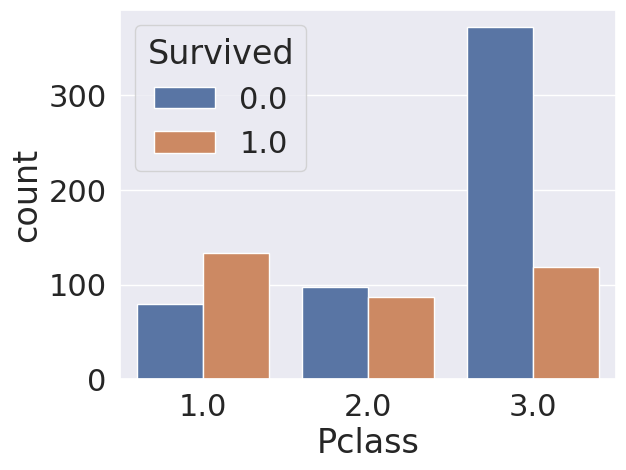

In [741]:
for i in ['Sex','Embarked','family','Pclass']:
    sns.countplot(data=dfi, x=i, hue='Survived')
    plt.show()

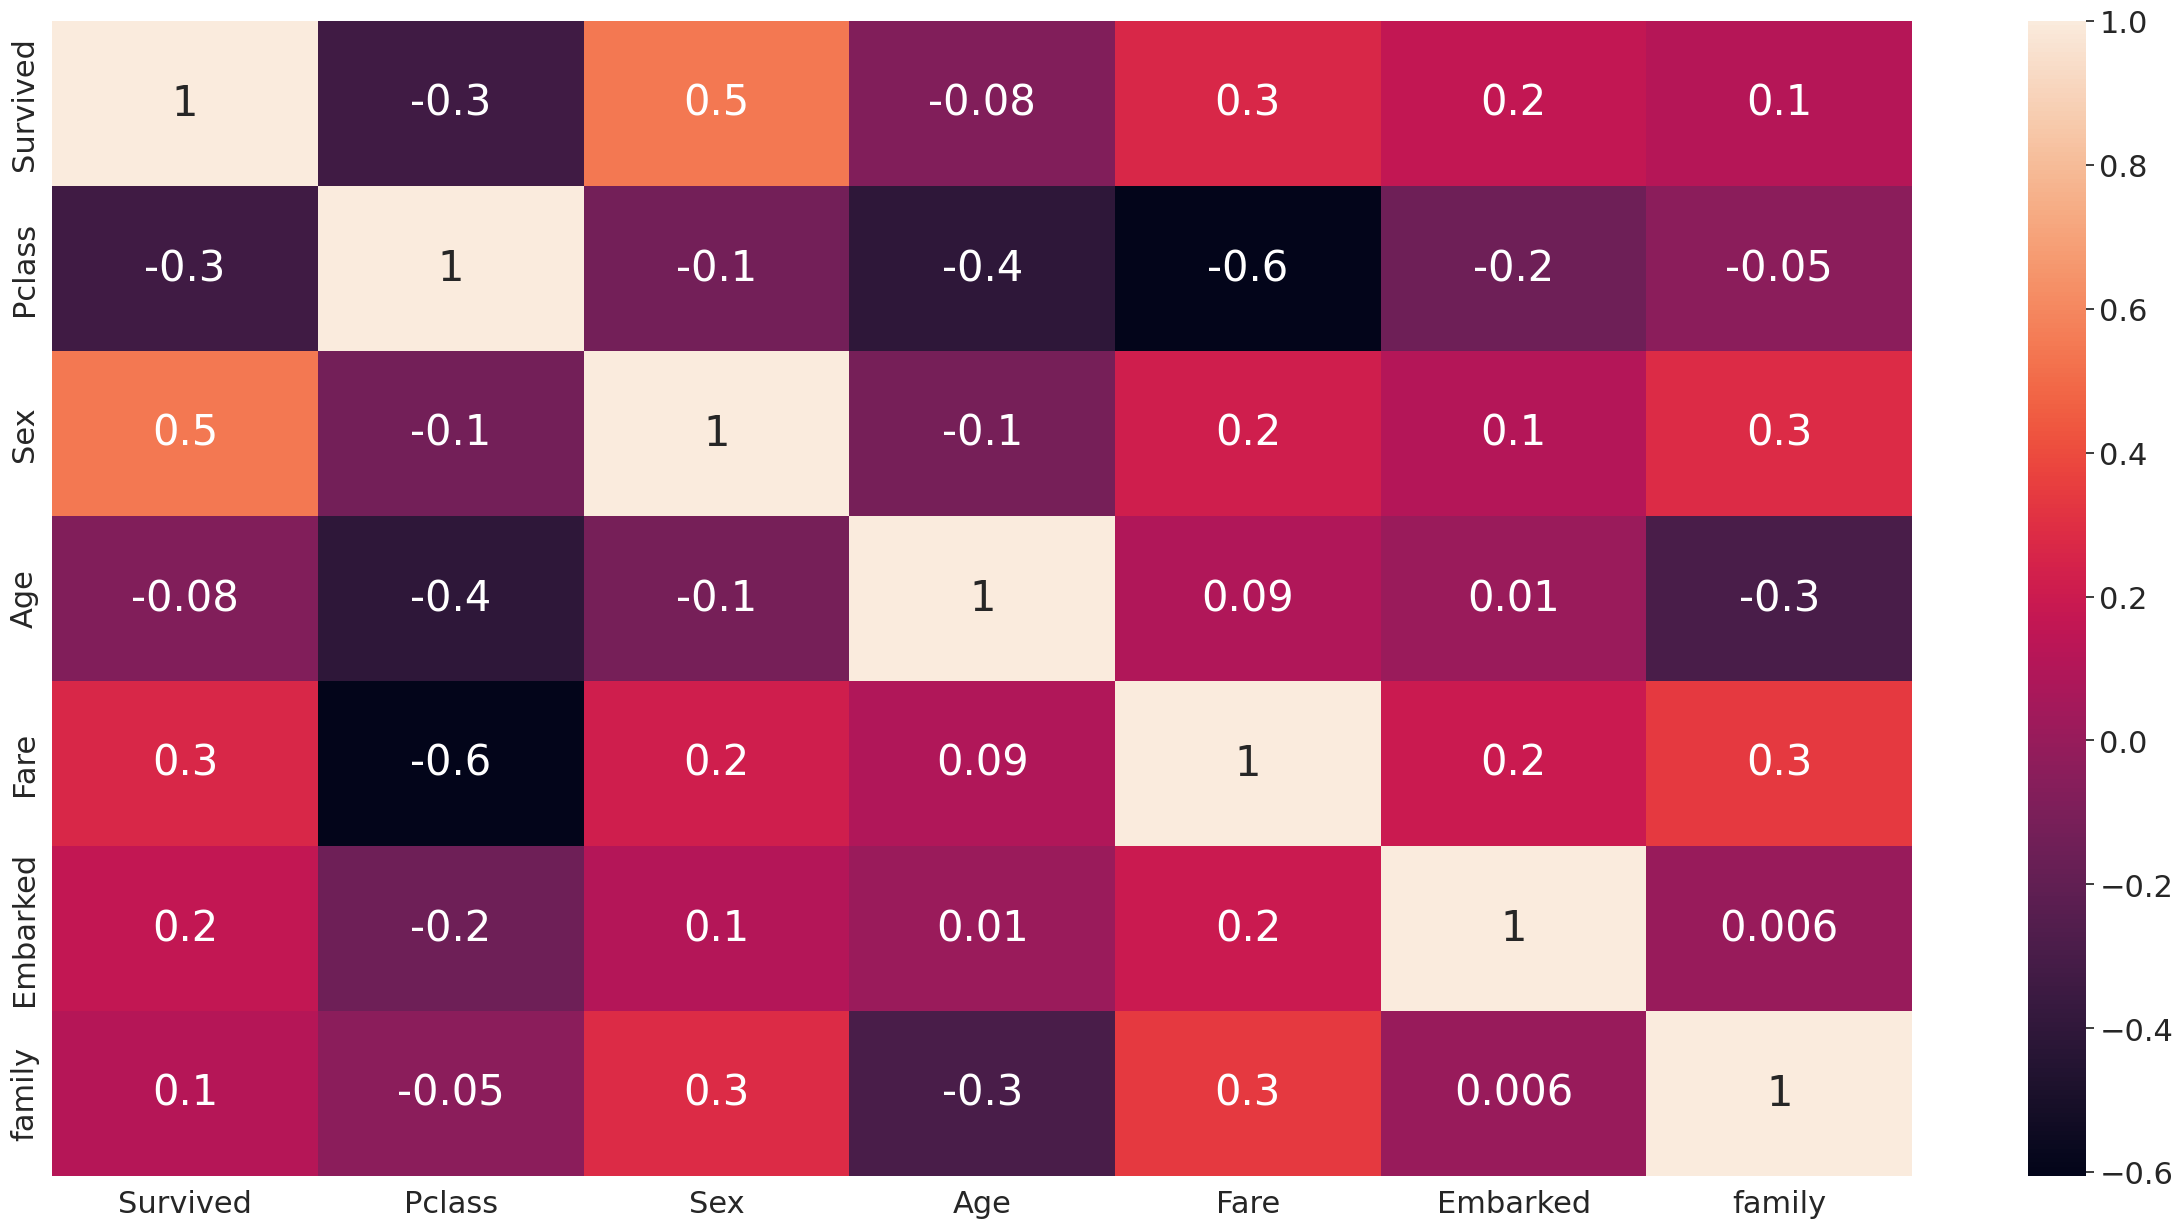

In [699]:
plt.figure(figsize=(30,15))
sns.heatmap(dfi.corr(),fmt='.1g',annot=True,annot_kws={'fontsize':30})
sns.set(font_scale=2)

<Axes: ylabel='count'>

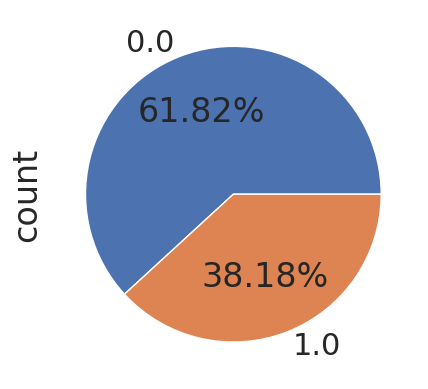

In [700]:
dfi['Survived'].value_counts().plot.pie(autopct='%.2f%%')

In [718]:
x= dfi.drop('Survived',axis=1)
y= dfi['Survived']

In [719]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder,StandardScaler
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=42,test_size=0.20)

sc=StandardScaler()
sc.fit(x_train)

x_train_sca = sc.transform(x_train)
x_test_sca = sc.transform(x_test)

In [716]:
from sklearn.ensemble import GradientBoostingClassifier , AdaBoostClassifier , BaggingClassifier , RandomForestClassifier , VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression,Lasso
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [735]:
lr = LogisticRegression()
lr.fit(x_train_sca,y_train)
lry_pred = lr.predict(x_test_sca)

print('Training  : ',lr.score(x_train_sca,y_train))
print('Testing : ',lr.score(x_test_sca,y_test))

print(classification_report(y_test,lry_pred))

recheck = cross_val_score(lr,x,y,cv=12)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,lry_pred) - recheck.mean())
print(confusion_matrix(y_test,lry_pred))

Training  :  0.7985915492957747
Testing :  0.8258426966292135
              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85       104
         1.0       0.79      0.80      0.79        74

    accuracy                           0.83       178
   macro avg       0.82      0.82      0.82       178
weighted avg       0.83      0.83      0.83       178

[0.7972973  0.71621622 0.81081081 0.81081081 0.85135135 0.82432432
 0.7972973  0.75675676 0.85135135 0.78378378 0.75675676 0.81081081]
0.7972972972972973
difference 0.028545399331916244
[[88 16]
 [15 59]]


In [736]:
knn =KNeighborsClassifier()
knn.fit(x_train_sca,y_train)
knny_pred = knn.predict(x_test_sca)

print('Training  : ',knn.score(x_train_sca,y_train))
print('Testing : ',knn.score(x_test_sca,y_test))

print(classification_report(y_test,knny_pred))

recheck = cross_val_score(knn,x,y,cv=15)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,knny_pred) - recheck.mean())
print(confusion_matrix(y_test,knny_pred))

Training  :  0.8605633802816901
Testing :  0.8314606741573034
              precision    recall  f1-score   support

         0.0       0.87      0.84      0.85       104
         1.0       0.78      0.82      0.80        74

    accuracy                           0.83       178
   macro avg       0.83      0.83      0.83       178
weighted avg       0.83      0.83      0.83       178

[0.61666667 0.76666667 0.7        0.74576271 0.74576271 0.69491525
 0.76271186 0.6779661  0.71186441 0.74576271 0.77966102 0.76271186
 0.72881356 0.76271186 0.81355932]
0.7343691148775895
difference 0.09709155927971391
[[87 17]
 [13 61]]


In [737]:
gs = GaussianNB()
gs.fit(x_train_sca,y_train)
gsy_pred = gs.predict(x_test_sca)

print('Training  : ',gs.score(x_train_sca,y_train))
print('Testing : ',gs.score(x_test_sca,y_test))

print(classification_report(y_test,gsy_pred))

recheck = cross_val_score(gs,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,gsy_pred) - recheck.mean())
print(confusion_matrix(y_test,gsy_pred))

Training  :  0.7774647887323943
Testing :  0.7865168539325843
              precision    recall  f1-score   support

         0.0       0.84      0.78      0.81       104
         1.0       0.72      0.80      0.76        74

    accuracy                           0.79       178
   macro avg       0.78      0.79      0.78       178
weighted avg       0.79      0.79      0.79       178

[0.73033708 0.78089888 0.78089888 0.76271186 0.79661017]
0.7702913730717958
difference 0.016225480860788455
[[81 23]
 [15 59]]


In [723]:
rfc= RandomForestClassifier(n_estimators=150)
rfc.fit(x_train_sca,y_train)
rfcy_pred = rfc.predict(x_test_sca)

print('Training  : ',rfc.score(x_train_sca,y_train))
print('Testing : ',rfc.score(x_test_sca,y_test))

print(classification_report(y_test,rfcy_pred))

recheck = cross_val_score(rfc,x,y,cv=12)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,rfcy_pred) - recheck.mean())
print(confusion_matrix(y_test,rfcy_pred))

Training  :  0.9915492957746479
Testing :  0.8651685393258427
              precision    recall  f1-score   support

         0.0       0.89      0.88      0.88       104
         1.0       0.83      0.85      0.84        74

    accuracy                           0.87       178
   macro avg       0.86      0.86      0.86       178
weighted avg       0.87      0.87      0.87       178

[0.74324324 0.7972973  0.82432432 0.83783784 0.86486486 0.83783784
 0.85135135 0.85135135 0.83783784 0.85135135 0.89189189 0.89189189]
0.84009009009009
difference 0.025078449235752753
[[91 13]
 [11 63]]


In [725]:
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV

rfc_param = {'max_depth':[5,10,15,20],
            'max_features':[5,7,8,'auto'],
            'criterion':['gini','entropy'],
            'min_samples_split':[4,8,16,24],
            'n_estimators':[100,200,300]}
clf = GridSearchCV(rfc, rfc_param,cv=5)
clf.fit(x_train_sca,y_train)

print(clf.best_score_)
print(clf.best_params_)

0.8450704225352113
{'criterion': 'gini', 'max_depth': 15, 'max_features': 'auto', 'min_samples_split': 16, 'n_estimators': 100}


In [742]:
rfc= RandomForestClassifier(n_estimators=100, criterion= 'gini',max_depth= 15, max_features= 'auto', min_samples_split= 16)
rfc.fit(x_train_sca,y_train)
rfcy_pred = rfc.predict(x_test_sca)

print('Training  : ',rfc.score(x_train_sca,y_train))
print('Testing : ',rfc.score(x_test_sca,y_test))

print(classification_report(y_test,rfcy_pred))

recheck = cross_val_score(rfc,x,y,cv=20)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,rfcy_pred) - recheck.mean())
print(confusion_matrix(y_test,rfcy_pred))

Training  :  0.8873239436619719
Testing :  0.8764044943820225
              precision    recall  f1-score   support

         0.0       0.87      0.92      0.90       104
         1.0       0.88      0.81      0.85        74

    accuracy                           0.88       178
   macro avg       0.88      0.87      0.87       178
weighted avg       0.88      0.88      0.88       178

[0.73333333 0.88888889 0.84444444 0.86666667 0.75555556 0.77777778
 0.91111111 0.91111111 0.95454545 0.88636364 0.84090909 0.86363636
 0.86363636 0.86363636 0.84090909 0.81818182 0.86363636 0.90909091
 0.84090909 0.86363636]
0.8548989898989898
difference 0.021505504483032678
[[96  8]
 [14 60]]


In [727]:
abc =AdaBoostClassifier()
abc.fit(x_train_sca,y_train)
abcy_pred = abc.predict(x_test_sca)

print('Training  : ',abc.score(x_train_sca,y_train))
print('Testing : ',abc.score(x_test_sca,y_test))

print(classification_report(y_test,abcy_pred))

recheck = cross_val_score(abc,x,y,cv=15)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,abcy_pred) - recheck.mean())
print(confusion_matrix(y_test,abcy_pred))

Training  :  0.8338028169014085
Testing :  0.8258426966292135
              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85       104
         1.0       0.78      0.81      0.79        74

    accuracy                           0.83       178
   macro avg       0.82      0.82      0.82       178
weighted avg       0.83      0.83      0.83       178

[0.73333333 0.78333333 0.8        0.83050847 0.71186441 0.91525424
 0.83050847 0.84745763 0.77966102 0.79661017 0.86440678 0.84745763
 0.79661017 0.79661017 0.86440678]
0.8132015065913372
difference 0.012641190037876338
[[87 17]
 [14 60]]


In [728]:
gbcbest = GradientBoostingClassifier()
gbcbest.fit(x_train_sca,y_train)
gbcy_pred = gbcbest.predict(x_test_sca)

print('Training  : ',gbcbest.score(x_train_sca,y_train))
print('Testing : ',gbcbest.score(x_test_sca,y_test))

print(classification_report(y_test,gbcy_pred))

recheck = cross_val_score(gbcbest,x,y,cv=15)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,gbcy_pred) - recheck.mean())
print(confusion_matrix(y_test,gbcy_pred))

Training  :  0.9154929577464789
Testing :  0.8539325842696629
              precision    recall  f1-score   support

         0.0       0.87      0.88      0.88       104
         1.0       0.83      0.81      0.82        74

    accuracy                           0.85       178
   macro avg       0.85      0.85      0.85       178
weighted avg       0.85      0.85      0.85       178

[0.76666667 0.85       0.86666667 0.77966102 0.84745763 0.88135593
 0.88135593 0.84745763 0.84745763 0.83050847 0.84745763 0.79661017
 0.88135593 0.83050847 0.88135593]
0.8423917137476459
difference 0.011540870522017022
[[92 12]
 [14 60]]


In [729]:
bc = BaggingClassifier()
bc.fit(x_train_sca,y_train)
bcy_pred = bc.predict(x_test_sca)

print('Training  : ',bc.score(x_train_sca,y_train))
print('Testing : ',bc.score(x_test_sca,y_test))

print(classification_report(y_test,bcy_pred))

recheck = cross_val_score(bc,x,y,cv=15)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,bcy_pred) - recheck.mean())
print(confusion_matrix(y_test,bcy_pred))

Training  :  0.9746478873239437
Testing :  0.8314606741573034
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86       104
         1.0       0.80      0.80      0.80        74

    accuracy                           0.83       178
   macro avg       0.83      0.83      0.83       178
weighted avg       0.83      0.83      0.83       178

[0.73333333 0.76666667 0.8        0.69491525 0.84745763 0.83050847
 0.84745763 0.83050847 0.77966102 0.83050847 0.86440678 0.76271186
 0.84745763 0.81355932 0.88135593]
0.8087005649717514
difference 0.022760109185552047
[[89 15]
 [15 59]]


In [730]:
dtc= DecisionTreeClassifier()
dtc.fit(x_train_sca,y_train)
dtcy_pred = dtc.predict(x_test_sca)

print('Training  : ',dtc.score(x_train_sca,y_train))
print('Testing : ',dtc.score(x_test_sca,y_test))

print(classification_report(y_test,dtcy_pred))

recheck = cross_val_score(dtc,x,y,cv=20)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,dtcy_pred) - recheck.mean())
print(confusion_matrix(y_test,dtcy_pred))

Training  :  0.9915492957746479
Testing :  0.8089887640449438
              precision    recall  f1-score   support

         0.0       0.86      0.81      0.83       104
         1.0       0.75      0.81      0.78        74

    accuracy                           0.81       178
   macro avg       0.80      0.81      0.81       178
weighted avg       0.81      0.81      0.81       178

[0.66666667 0.84444444 0.84444444 0.71111111 0.68888889 0.66666667
 0.86666667 0.8        0.90909091 0.77272727 0.86363636 0.77272727
 0.72727273 0.88636364 0.79545455 0.72727273 0.84090909 0.86363636
 0.81818182 0.79545455]
0.793080808080808
difference 0.015907955964135745
[[84 20]
 [14 60]]


In [731]:
dtc_param = {'max_depth':[5,10,15,20],
            'max_features':[5,7,8,'auto'],
            'criterion':['gini','entropy'],
            'min_samples_split':[4,8,16,24]
            }
clf = GridSearchCV(dtc, dtc_param,cv=5)
clf.fit(x_train_sca,y_train)

print(clf.best_score_)
print(clf.best_params_)

0.8295774647887324
{'criterion': 'entropy', 'max_depth': 5, 'max_features': 5, 'min_samples_split': 4}


In [734]:
dtc= DecisionTreeClassifier(min_samples_split= 4, max_features=5, max_depth= 5, criterion= 'entropy')
dtc.fit(x_train_sca,y_train)
dtcy_pred = dtc.predict(x_test_sca)

print('Training  : ',dtc.score(x_train_sca,y_train))
print('Testing : ',dtc.score(x_test_sca,y_test))

print(classification_report(y_test,dtcy_pred))

recheck = cross_val_score(dtc,x,y,cv=11)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,dtcy_pred) - recheck.mean())
print(confusion_matrix(y_test,dtcy_pred))

Training  :  0.8633802816901408
Testing :  0.8539325842696629
              precision    recall  f1-score   support

         0.0       0.85      0.90      0.88       104
         1.0       0.85      0.78      0.82        74

    accuracy                           0.85       178
   macro avg       0.85      0.84      0.85       178
weighted avg       0.85      0.85      0.85       178

[0.77777778 0.82716049 0.79012346 0.85185185 0.87654321 0.83950617
 0.83950617 0.79012346 0.8125     0.8375     0.8375    ]
0.825462962962963
difference 0.028469621306699944
[[94 10]
 [16 58]]


In [738]:
classifier = [('RandomForestClassifier',rfc),('GradientBoostingClassifier',gbcbest),('DecisionTreeClassifier',dtc)]
vc= VotingClassifier(estimators=classifier)
vc.fit(x_train_sca,y_train)
vcy_pred = vc.predict(x_test_sca)

print('Training  : ',vc.score(x_train_sca,y_train))
print('Testing : ',vc.score(x_test_sca,y_test))

print(classification_report(y_test,vcy_pred))

recheck = cross_val_score(vc,x,y,cv=20)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,vcy_pred) - recheck.mean())
print(confusion_matrix(y_test,vcy_pred))

Training  :  0.8929577464788733
Testing :  0.8707865168539326
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89       104
         1.0       0.85      0.84      0.84        74

    accuracy                           0.87       178
   macro avg       0.87      0.87      0.87       178
weighted avg       0.87      0.87      0.87       178

[0.71111111 0.88888889 0.8        0.86666667 0.75555556 0.77777778
 0.88888889 0.91111111 0.93181818 0.84090909 0.86363636 0.86363636
 0.81818182 0.84090909 0.79545455 0.79545455 0.84090909 0.90909091
 0.84090909 0.84090909]
0.8390909090909091
difference 0.03169560776302349
[[93 11]
 [12 62]]


VotingClassifier and RandomForest gives highest testing accuracy of 87%

.

.

In [765]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [751]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [752]:
test_data.duplicated().sum()

0

In [753]:
test_data = test_data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
test_data.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [754]:
test_data['Embarked'] = test_data['Embarked'].map({'S':0,'C':2,'Q':1})

test_data.Embarked.value_counts()

Embarked
0    270
2    102
1     46
Name: count, dtype: int64

In [755]:
test_data['Sex'] = test_data['Sex'].map({'male':0,'female':1})
test_data['Sex'].value_counts()

Sex
0    266
1    152
Name: count, dtype: int64

In [756]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
iti = IterativeImputer()
dfi2 = iti.fit_transform(test_data)
dfi2 = pd.DataFrame(dfi2,columns=test_data.columns)

In [757]:
dfi2['family'] = dfi2['SibSp'] + dfi2['Parch']+1
dfi2 = dfi2.drop(['SibSp','Parch'],axis=1)

def people(total):
    if total == 1:
        return 0
    elif total > 1 and total<5:
        return 1
    else:
        return 2
    
dfi2['family'] = dfi2['family'].apply(people)
dfi2['family'].value_counts()

family
0    253
1    145
2     20
Name: count, dtype: int64

In [758]:
dfi2

,Pclass,Sex,Age,Fare,Embarked,family
0,3.0,0.0,34.500000,7.8292,1.0,0
1,3.0,1.0,47.000000,7.0000,0.0,1
2,2.0,0.0,62.000000,9.6875,1.0,0
3,3.0,0.0,27.000000,8.6625,0.0,0
4,3.0,1.0,22.000000,12.2875,0.0,1
...,...,...,...,...,...,...
413,3.0,0.0,25.224941,8.0500,0.0,0
414,1.0,1.0,39.000000,108.9000,2.0,0
415,3.0,0.0,38.500000,7.2500,0.0,0
416,3.0,0.0,25.224941,8.0500,0.0,0


In [759]:
dfi2.isnull().sum()

Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
family      0
dtype: int64

<Axes: >

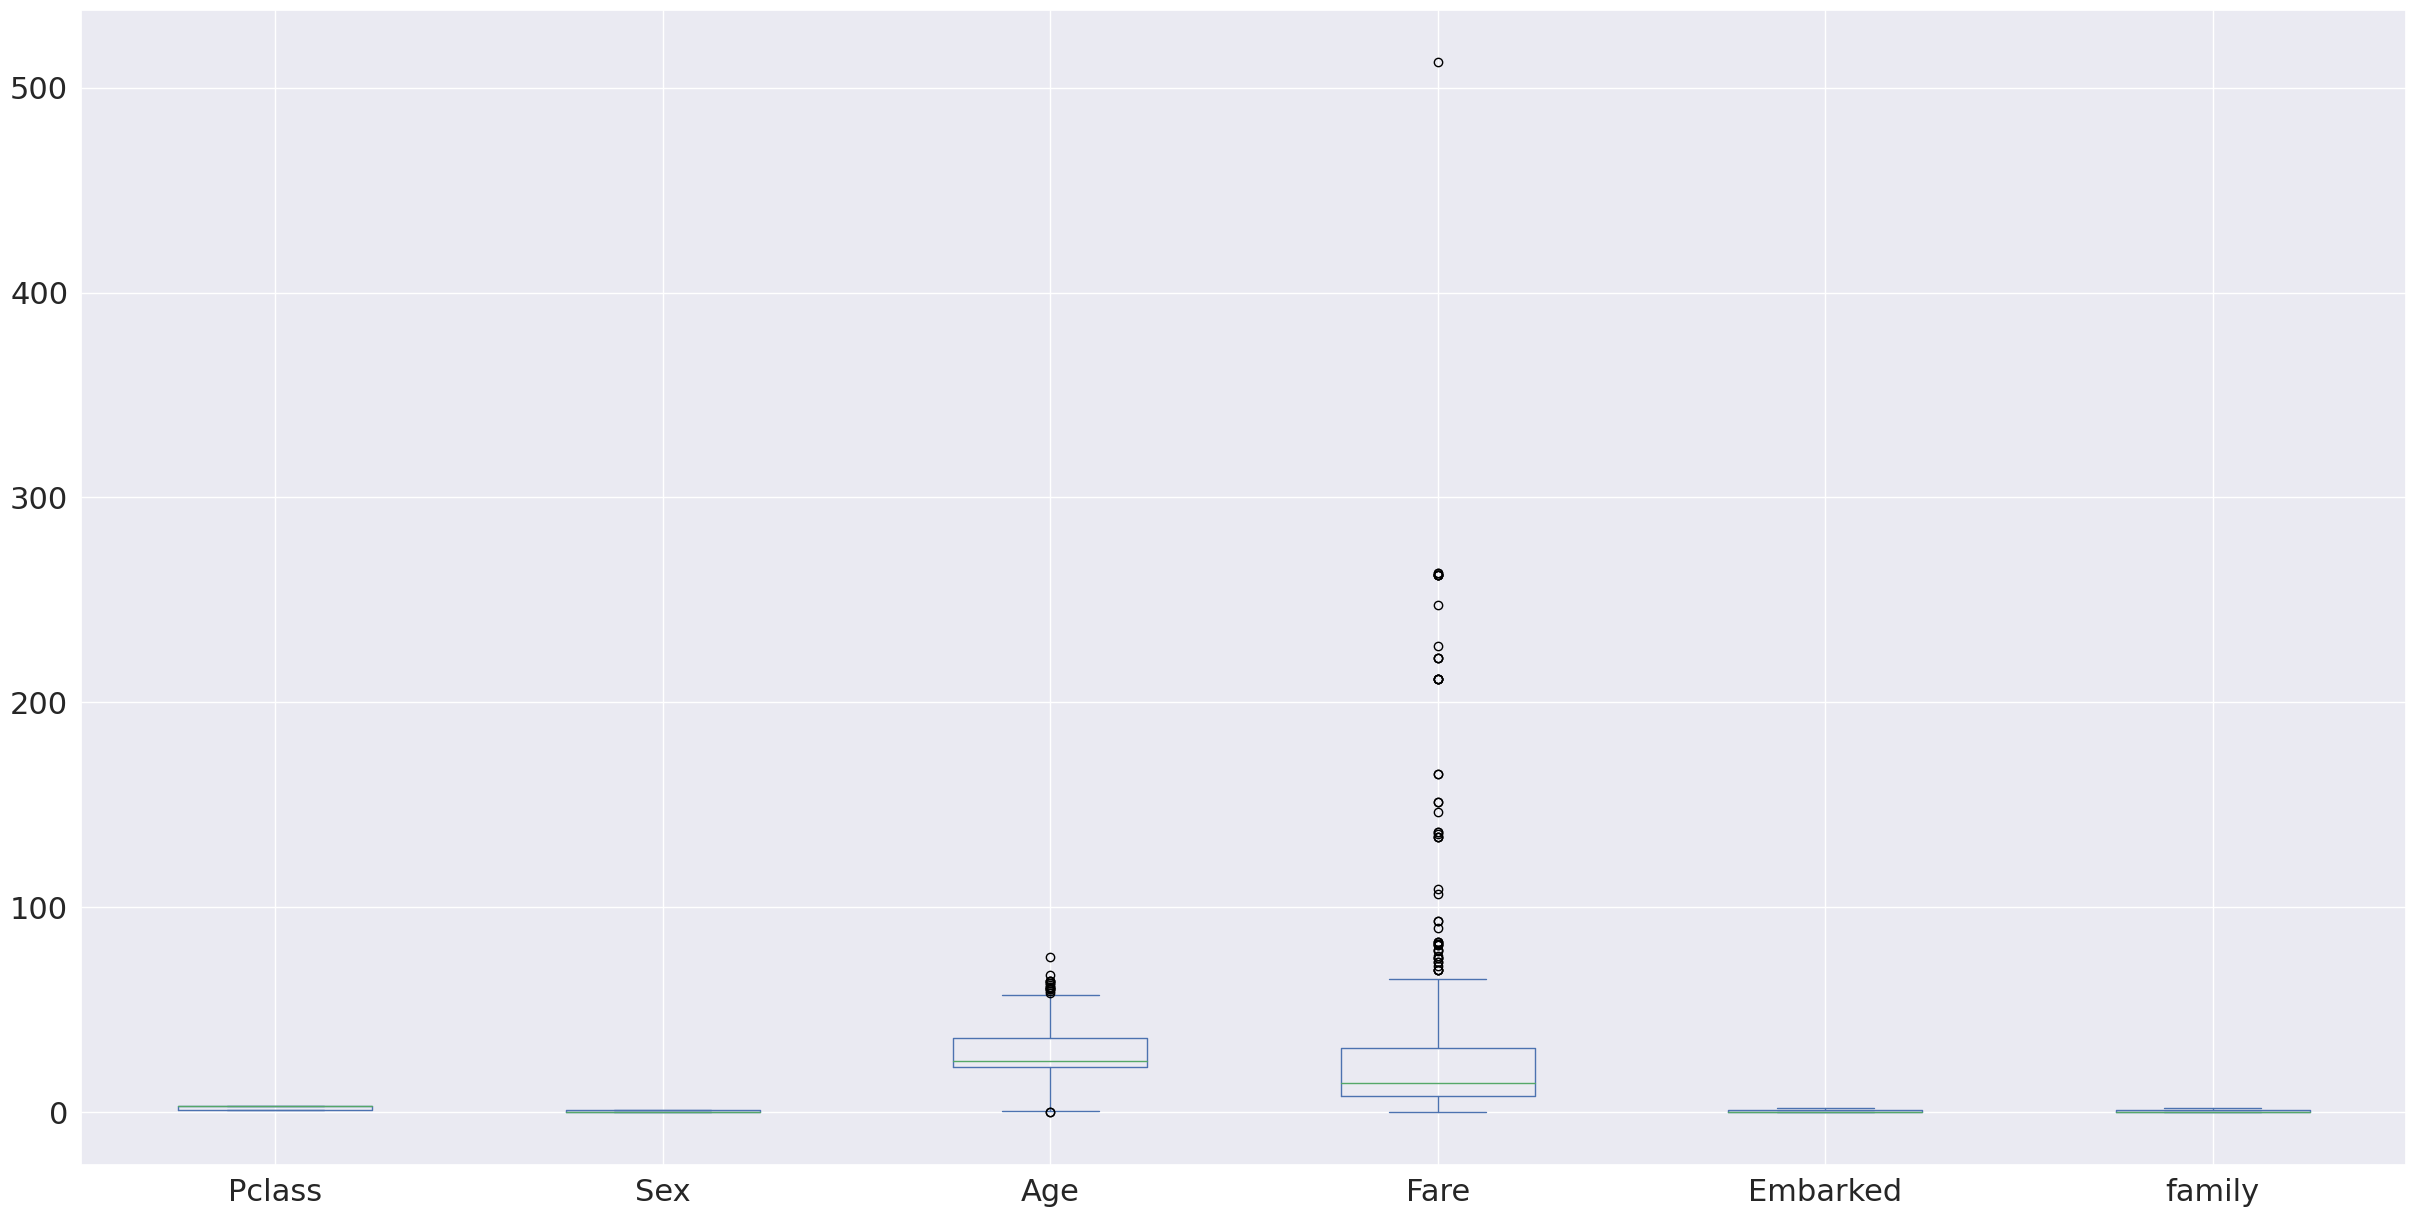

In [760]:
dfi2.plot(kind='box',figsize=(30,15))

In [761]:
predicting_test = rfc.predict(dfi2)
predicting_test

array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [762]:
sample = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")
sample

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [763]:
test = pd.DataFrame(predicting_test)
test

,0
0,0.0
1,1.0
2,0.0
3,0.0
4,1.0
...,...
413,0.0
414,1.0
415,0.0
416,0.0


In [767]:
submission = pd.DataFrame({'PassengerId':test_data['PassengerId'],'Survived':predicting_test})
submission

,PassengerId,Survived
0,892,0.0
1,893,1.0
2,894,0.0
3,895,0.0
4,896,1.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


In [771]:
filename = 'Titanic_ML.csv'
submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: Titanic_ML.csv
